# Проект: Дашборд конверсий

### Импортируем нужные библиотеки:
###### 1. pandas и numpy для обработки данных;
###### 2. requests для обработки данных из HTTP-запроса
###### 4. matplotlib и seaborn для визуализаций
###### 5. dotenv и os для работы с переменными окружения

In [3]:
import os
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import requests as rq
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Получаем данные посетителей и зарегистрировавшихся

##### 1.1 Выгрузка переменных окружения и создание папки для графиков

In [4]:
# Создаем .env файл
env_content = """API_URL=https://data-charts-api.hexlet.app
DATE_BEGIN=2023-03-01
DATE_END=2023-09-01"""

with open('.env', 'w') as f:
    f.write(env_content)

load_dotenv() # загружаются переменные из файла .env

# Получаем значения переменных окружения
API_URL = os.getenv('API_URL')
DATE_BEGIN = os.getenv('DATE_BEGIN')
DATE_END = os.getenv('DATE_END')

# Создаем директорию для графиков
if not os.path.exists('./charts'):
    os.makedirs('./charts')

##### 1.2 Добавляем датафрейм с посещениями

In [5]:
#https://data-charts-api.hexlet.app/visits?begin=2023-03-01&end=2023-09-01
url_v = f'{API_URL}/visits?begin={DATE_BEGIN}&end={DATE_END}'
visits_url = rq.get(url_v)
json_df_visits_url = visits_url.json()
visits_df_url = pd.DataFrame(json_df_visits_url)

visits_df_url

,visit_id,platform,user_agent,datetime
0,1de9ea66-70d3-4a1f-8735-df5ef7697fb9,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01T10:36:22
1,f149f542-e935-4870-9734-6b4501eaf614,web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,2023-03-01T06:25:00
2,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,2023-03-01T10:26:13
3,19322fed-157c-49c6-b16e-2d5cabeb9592,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,2023-03-01T12:33:06
4,04762a22-3c9f-40c9-9ac9-6628c4381836,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01T01:38:35
...,...,...,...,...
263454,6d2e2f5b-970b-4dfe-8f57-25711a5b2a5d,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,2023-08-29T10:43:29
263455,1d91535e-d984-4f76-bbaa-c14c0fd4f2e2,web,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...,2023-08-29T19:29:16
263456,f2496721-7126-430d-976e-777a6cdccb4f,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-08-29T12:51:11
263457,f2496721-7126-430d-976e-777a6cdccb4f,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-08-29T21:45:08


##### 1.3 Добавляем датафрейм с регистрациями

In [6]:
#https://data-charts-api.hexlet.app/registrations?begin=2023-03-01&end=2023-09-01
regs_url = rq.get(f'{API_URL}/registrations?begin={DATE_BEGIN}&end={DATE_END}')
json_df_regs_url = regs_url.json()
regs_df_url = pd.DataFrame(json_df_regs_url)

regs_df_url

,datetime,user_id,email,platform,registration_type
0,2023-03-01T07:40:13,2e0f6bb8-b029-4f45-a786-2b53990d37f1,ebyrd@example.org,web,google
1,2023-03-01T13:14:00,f007f97c-9d8b-48b5-af08-119bb8f6d9b6,knightgerald@example.org,web,email
2,2023-03-01T03:05:50,24ff46ae-32b3-4a74-8f27-7cf0b8f32f15,cherylthompson@example.com,web,apple
3,2023-03-01T00:04:47,3e9914e1-5d73-4c23-b25d-b59a3aeb2b60,halldavid@example.org,web,email
4,2023-03-01T18:31:52,27f875fc-f8ce-4aeb-8722-0ecb283d0760,denise86@example.net,web,google
...,...,...,...,...,...
21831,2023-08-31T07:32:08,a94b4a28-f25c-433c-b4ef-85af7d5b0c11,ikelley@example.net,ios,apple
21832,2023-08-31T23:25:50,fc709c6b-528b-40d8-8980-c2c278e5a628,brittanycox@example.net,ios,apple
21833,2023-08-31T19:29:18,11e32805-7571-4108-8e50-e211d051bf7e,aryan@example.net,ios,apple
21834,2023-08-31T19:38:54,bce7b818-768b-434a-b6af-573cd60bff7f,emartinez@example.net,ios,email


## 2. Краткая сводка по данным

##### 2.1 Данные с посетителями

In [7]:
visits_df_url.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263459 entries, 0 to 263458
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   visit_id    263459 non-null  object
 1   platform    263459 non-null  object
 2   user_agent  263459 non-null  object
 3   datetime    263459 non-null  object
dtypes: object(4)
memory usage: 8.0+ MB


##### 2.2 Данные с зарегистрировавшимися

In [8]:
regs_df_url.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21836 entries, 0 to 21835
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   datetime           21836 non-null  object
 1   user_id            21836 non-null  object
 2   email              21836 non-null  object
 3   platform           21836 non-null  object
 4   registration_type  21836 non-null  object
dtypes: object(5)
memory usage: 853.1+ KB


## 3. Считаем конверсию из посетителей в зарегистрировавшихся 

##### 3.1 Обрабатывааем визиты

In [9]:
# Преобразуем datetime
visits_df_url['datetime'] = pd.to_datetime(visits_df_url['datetime'])

# Обрабатываем визиты - фильтруем ботов и берем последний визит
visits_clean = visits_df_url[~visits_df_url['user_agent'].str.contains('bot', case=False, na=False)]
visits_last = visits_clean.sort_values('datetime').groupby('visit_id').last().reset_index()
visits_last['date_group'] = visits_last['datetime'].dt.date
# Группируем визиты по дате и платформе
visits_grouped = visits_last.groupby(['date_group', 'platform']).size().reset_index(name='visits')

visits_grouped

,date_group,platform,visits
0,2023-03-01,android,75
1,2023-03-01,ios,22
2,2023-03-01,web,279
3,2023-03-02,android,67
4,2023-03-02,ios,31
...,...,...,...
547,2023-08-30,ios,66
548,2023-08-30,web,1227
549,2023-08-31,android,57
550,2023-08-31,ios,50


##### 3.2 Обрабатываем регистриции

In [10]:
# Преобразуем datetime
regs_df_url['datetime'] = pd.to_datetime(regs_df_url['datetime'])

# Обрабатываем регистрации
regs_df_url['date_group'] = regs_df_url['datetime'].dt.date
regs_grouped = regs_df_url.groupby(['date_group', 'platform']).size().reset_index(name='registrations')

regs_grouped

,date_group,platform,registrations
0,2023-03-01,android,61
1,2023-03-01,ios,18
2,2023-03-01,web,8
3,2023-03-02,android,59
4,2023-03-02,ios,24
...,...,...,...
547,2023-08-30,ios,40
548,2023-08-30,web,34
549,2023-08-31,android,42
550,2023-08-31,ios,36


##### 3.3 Объединяем и рассчитываем конверсию

In [11]:
merged_df = pd.merge(visits_grouped, regs_grouped, on=['date_group', 'platform'], how='left')
merged_df['registrations'] = merged_df['registrations'].fillna(0)
merged_df['conversion'] = (merged_df['registrations'] / merged_df['visits'] * 100)

# Сортируем и сохраняем
merged_df = merged_df.sort_values(['date_group', 'platform']).reset_index(drop=True)
merged_df

,date_group,platform,visits,registrations,conversion
0,2023-03-01,android,75,61,81.333333
1,2023-03-01,ios,22,18,81.818182
2,2023-03-01,web,279,8,2.867384
3,2023-03-02,android,67,59,88.059701
4,2023-03-02,ios,31,24,77.419355
...,...,...,...,...,...
547,2023-08-30,ios,66,40,60.606061
548,2023-08-30,web,1227,34,2.770986
549,2023-08-31,android,57,42,73.684211
550,2023-08-31,ios,50,36,72.000000


##### 3.4 Создаём json файл с конверсией из покупателей в регистрации

In [12]:
merged_df.to_json('./conversion.json')

## 4. Выводим данные по рекламным кампаниям

##### 4.1 Создаём датафрейм о рекламных компаниях

In [13]:
#добавляем датафрейм о рекламных кампаниях
ads_df = pd.read_csv('ads.csv')
ads_df

,date,utm_source,utm_medium,utm_campaign,cost
0,2023-03-01 10:54:41,google,cpc,advanced_algorithms_series,212
1,2023-03-02 10:32:35,google,cpc,advanced_algorithms_series,252
2,2023-03-03 19:21:40,google,cpc,advanced_algorithms_series,202
3,2023-03-04 17:52:04,google,cpc,advanced_algorithms_series,223
4,2023-03-05 5:35:13,google,cpc,advanced_algorithms_series,265
...,...,...,...,...,...
154,2023-09-13 5:34:02,vk,social,intro_to_python_course,277
155,2023-09-14 18:25:13,vk,social,intro_to_python_course,221
156,2023-09-15 15:35:47,vk,social,intro_to_python_course,175
157,2023-09-16 5:30:26,vk,social,intro_to_python_course,224


##### 4.2 Обрабатываем рекламные данные

In [14]:
# Преобразуем дату в ads.csv
ads_df['date_group'] = pd.to_datetime(ads_df['date']).dt.date

# Группируем рекламные данные по дате
ads_grouped = ads_df.groupby('date_group').agg({
    'cost': 'sum',
    'utm_campaign': 'first'
}).reset_index()

# Создаем датафрейм конверсий по дате (агрегируем по всем платформам)
conversion_by_date = merged_df.groupby('date_group').agg({
    'visits': 'sum',
    'registrations': 'sum'
}).reset_index()

# Объединяем с рекламными данными
ads_merged = pd.merge(conversion_by_date, ads_grouped, on='date_group', how='left')

# Заполняем пропущенные значения
ads_merged['cost'] = ads_merged['cost'].fillna(0)
ads_merged['utm_campaign'] = ads_merged['utm_campaign'].fillna('none')

# Сортируем по дате
ads_merged = ads_merged.sort_values('date_group').reset_index(drop=True)

ads_merged

,date_group,visits,registrations,cost,utm_campaign
0,2023-03-01,376,87,212.0,advanced_algorithms_series
1,2023-03-02,613,106,252.0,advanced_algorithms_series
2,2023-03-03,683,107,202.0,advanced_algorithms_series
3,2023-03-04,647,159,223.0,advanced_algorithms_series
4,2023-03-05,707,115,265.0,advanced_algorithms_series
...,...,...,...,...,...
179,2023-08-27,795,88,222.0,intro_to_python_course
180,2023-08-28,635,83,223.0,intro_to_python_course
181,2023-08-29,1268,143,190.0,intro_to_python_course
182,2023-08-30,1328,101,109.0,intro_to_python_course


##### 4.2 Создаём json файл с рекламой

In [15]:
# Сохраняем в JSON
ads_merged.to_json('./ads.json', orient='columns', date_format='epoch')

## 5. Визуализация

##### 5.1 Итоговые визиты

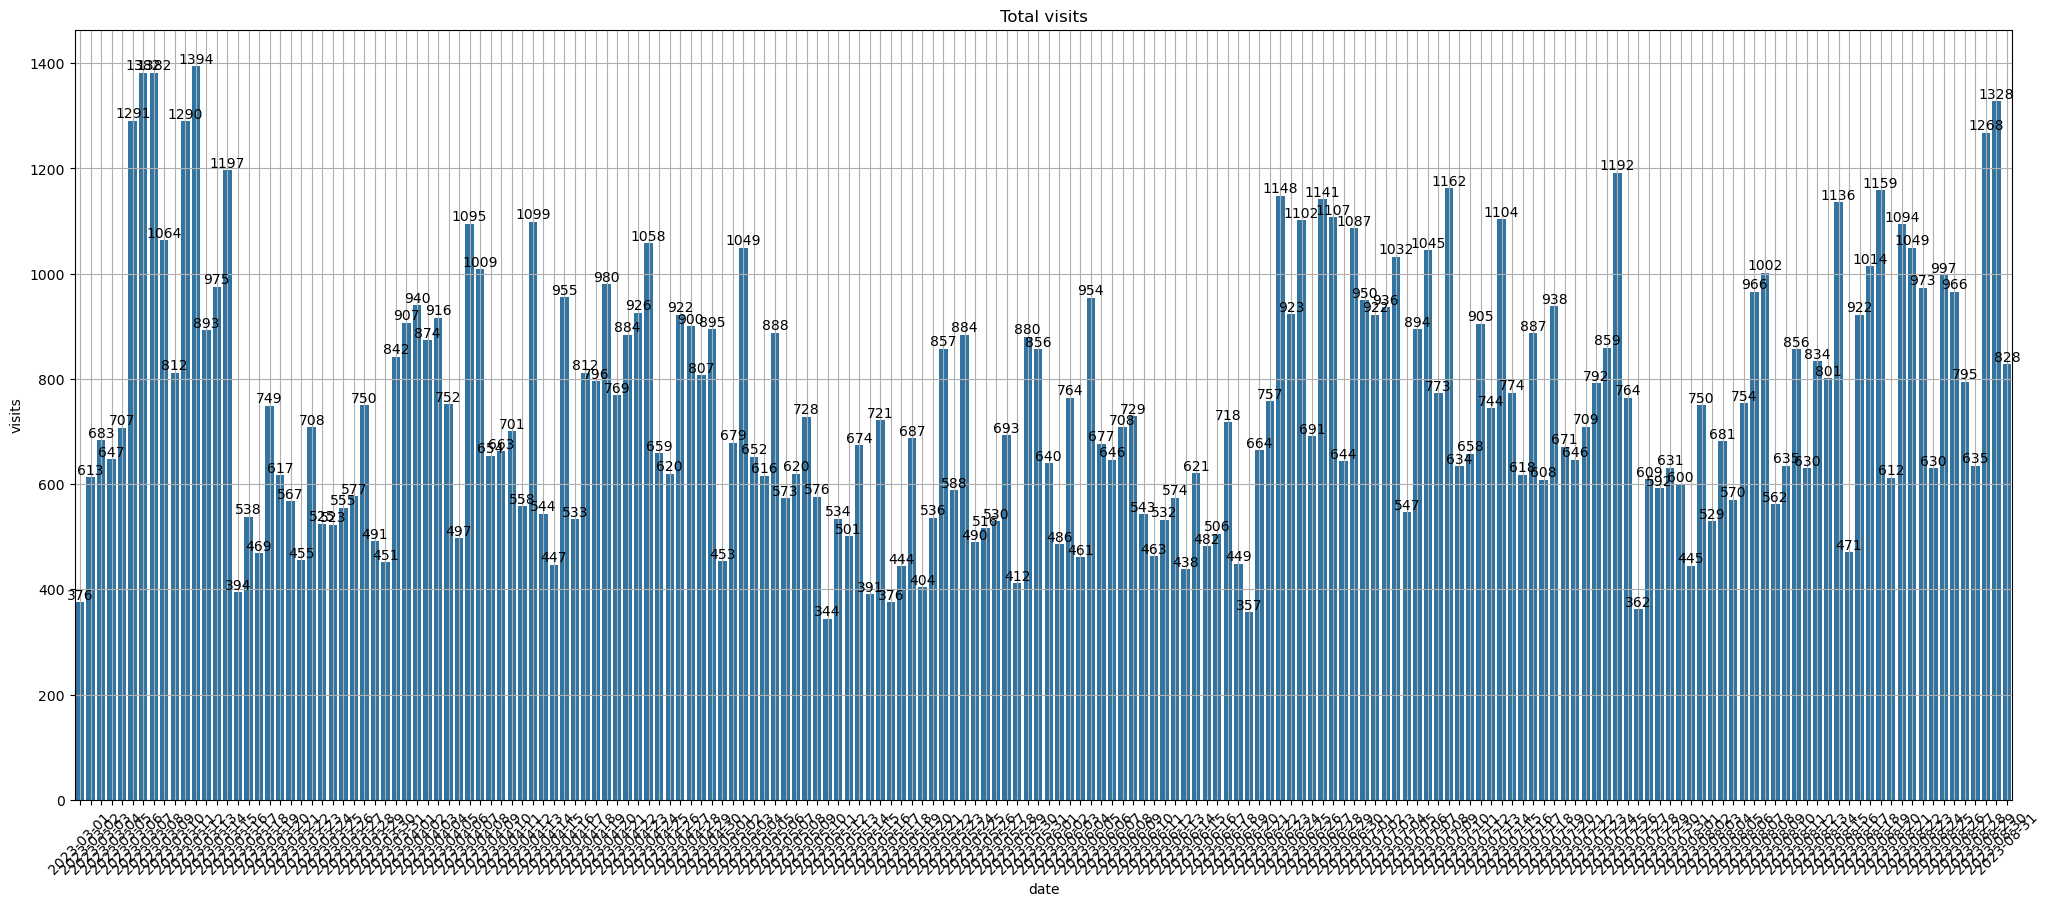

In [16]:
plt.figure(figsize = (25, 10))

ax = sns.barplot(
    x='date_group',
    y='visits',
    data=ads_merged
)
ax.bar_label(ax.containers[0])
plt.title('Total visits')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.grid()

#Сохраняем график
plt.savefig(f'./charts/1.visits_by_date.png')

plt.show()

##### 5.2 Итоговые визиты с разбивкой по платформам: web, android, ios

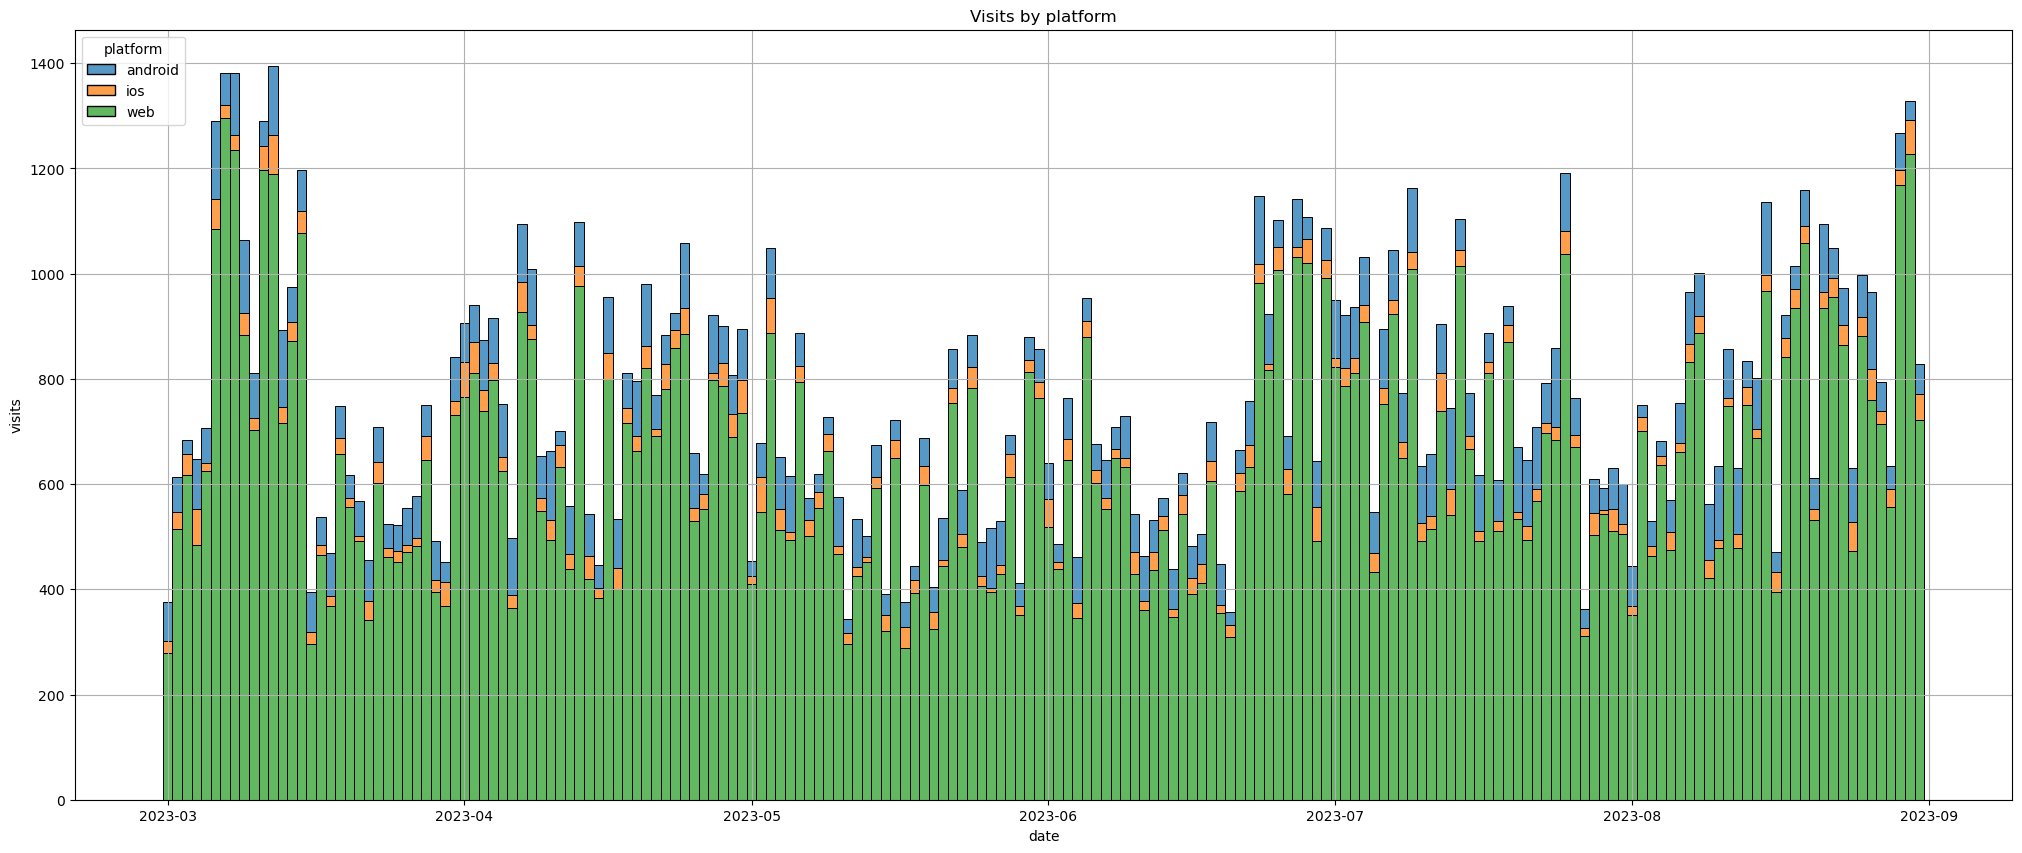

In [17]:
plt.figure(figsize=(25, 10))

ax = sns.histplot(
    x='date_group',
    weights='visits',
    hue='platform',
    data=merged_df,
    multiple='stack',
    bins=184
)

plt.title('Visits by platform')
plt.xlabel('date')
plt.ylabel('visits')
plt.grid(True)

#Сохраняем график
plt.savefig('./charts/2.visits_by_web_andr_ios.png')

plt.show()

##### 5.3 Итоговые регистрации

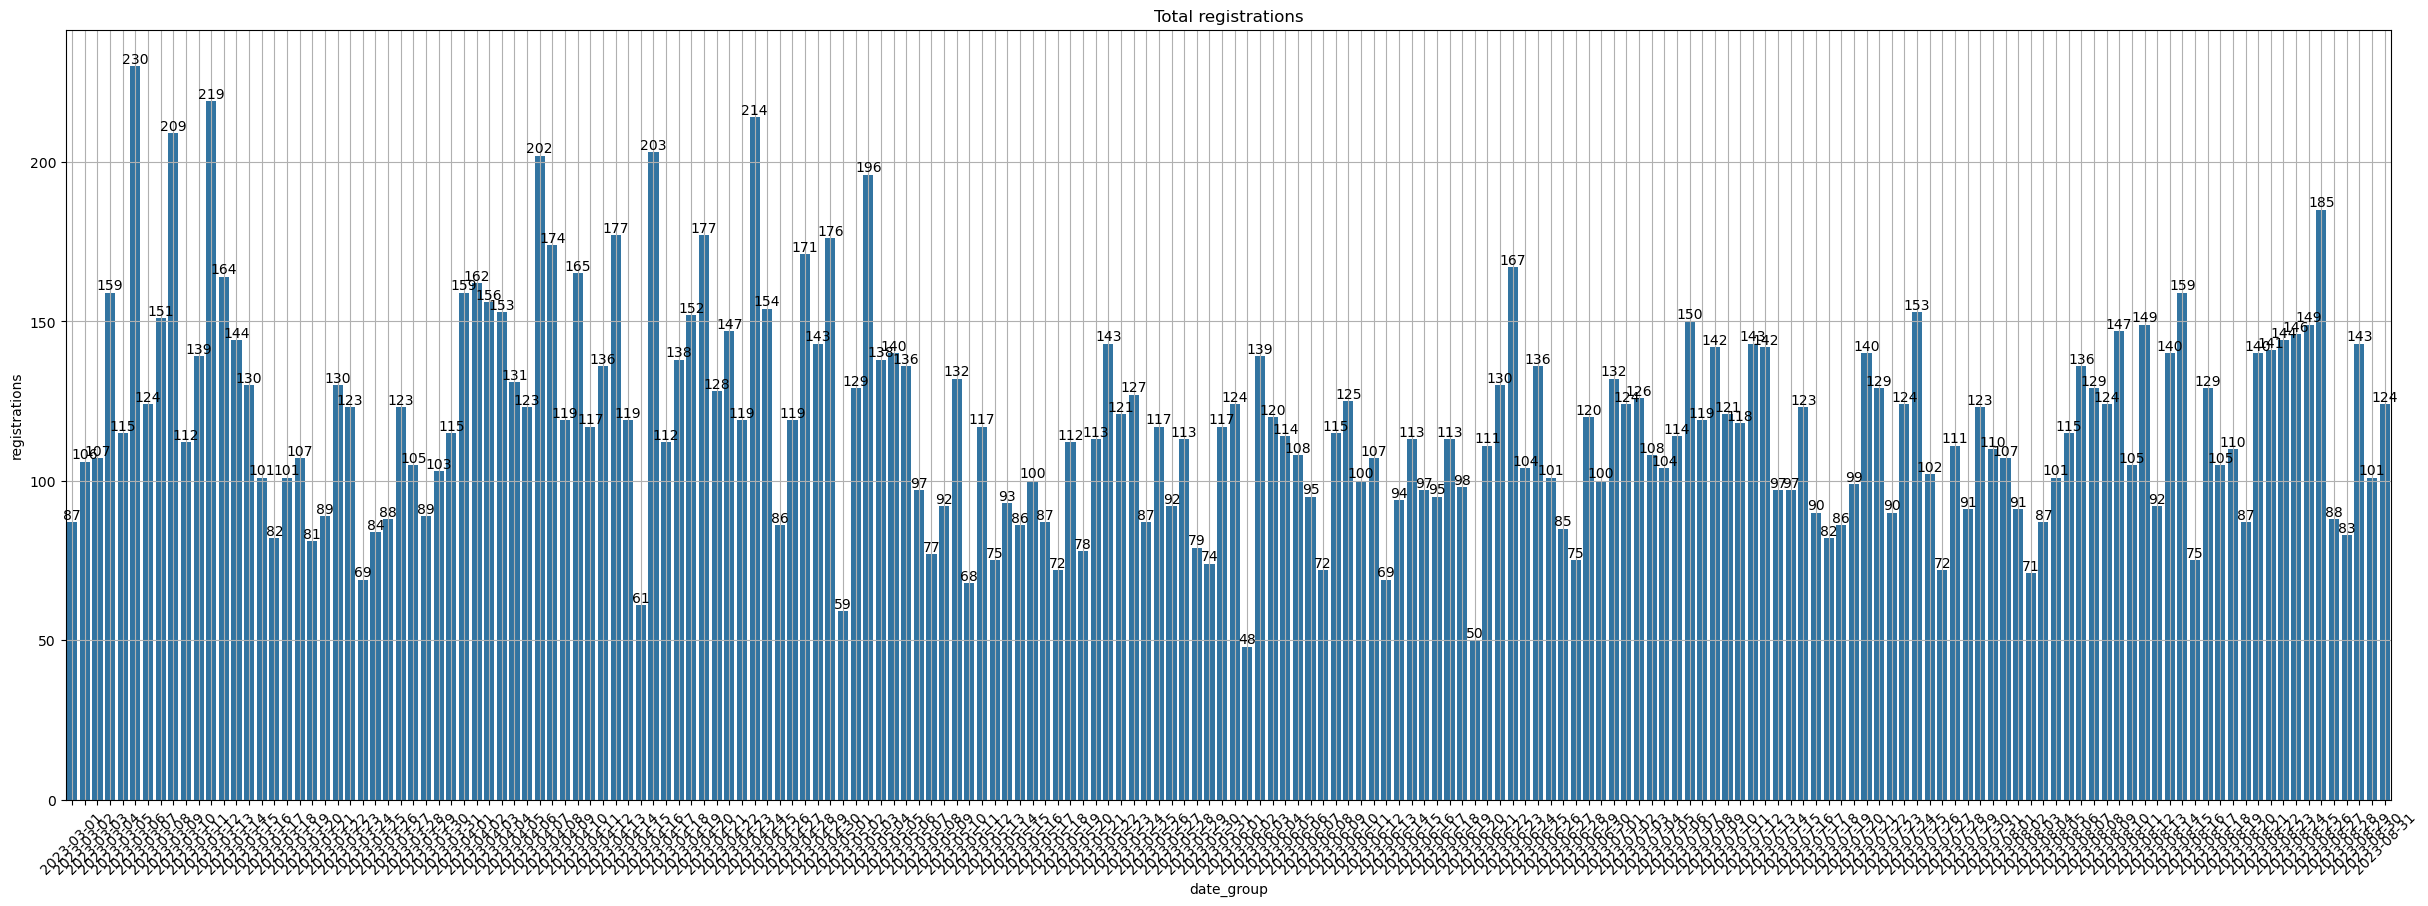

In [18]:
plt.figure(figsize = (30, 10))

ax = sns.barplot(
    x = 'date_group',
    y = 'registrations',
    data=ads_merged
)

ax.bar_label(ax.containers[0])
plt.title('Total registrations')
plt.xticks(rotation=45)
plt.grid()

#Сохраняем график
plt.savefig('./charts/3.regs_by_date.png')

plt.show()

##### 5.4 Итоговые регистрации с разбивкой по платформе: web, android, ios

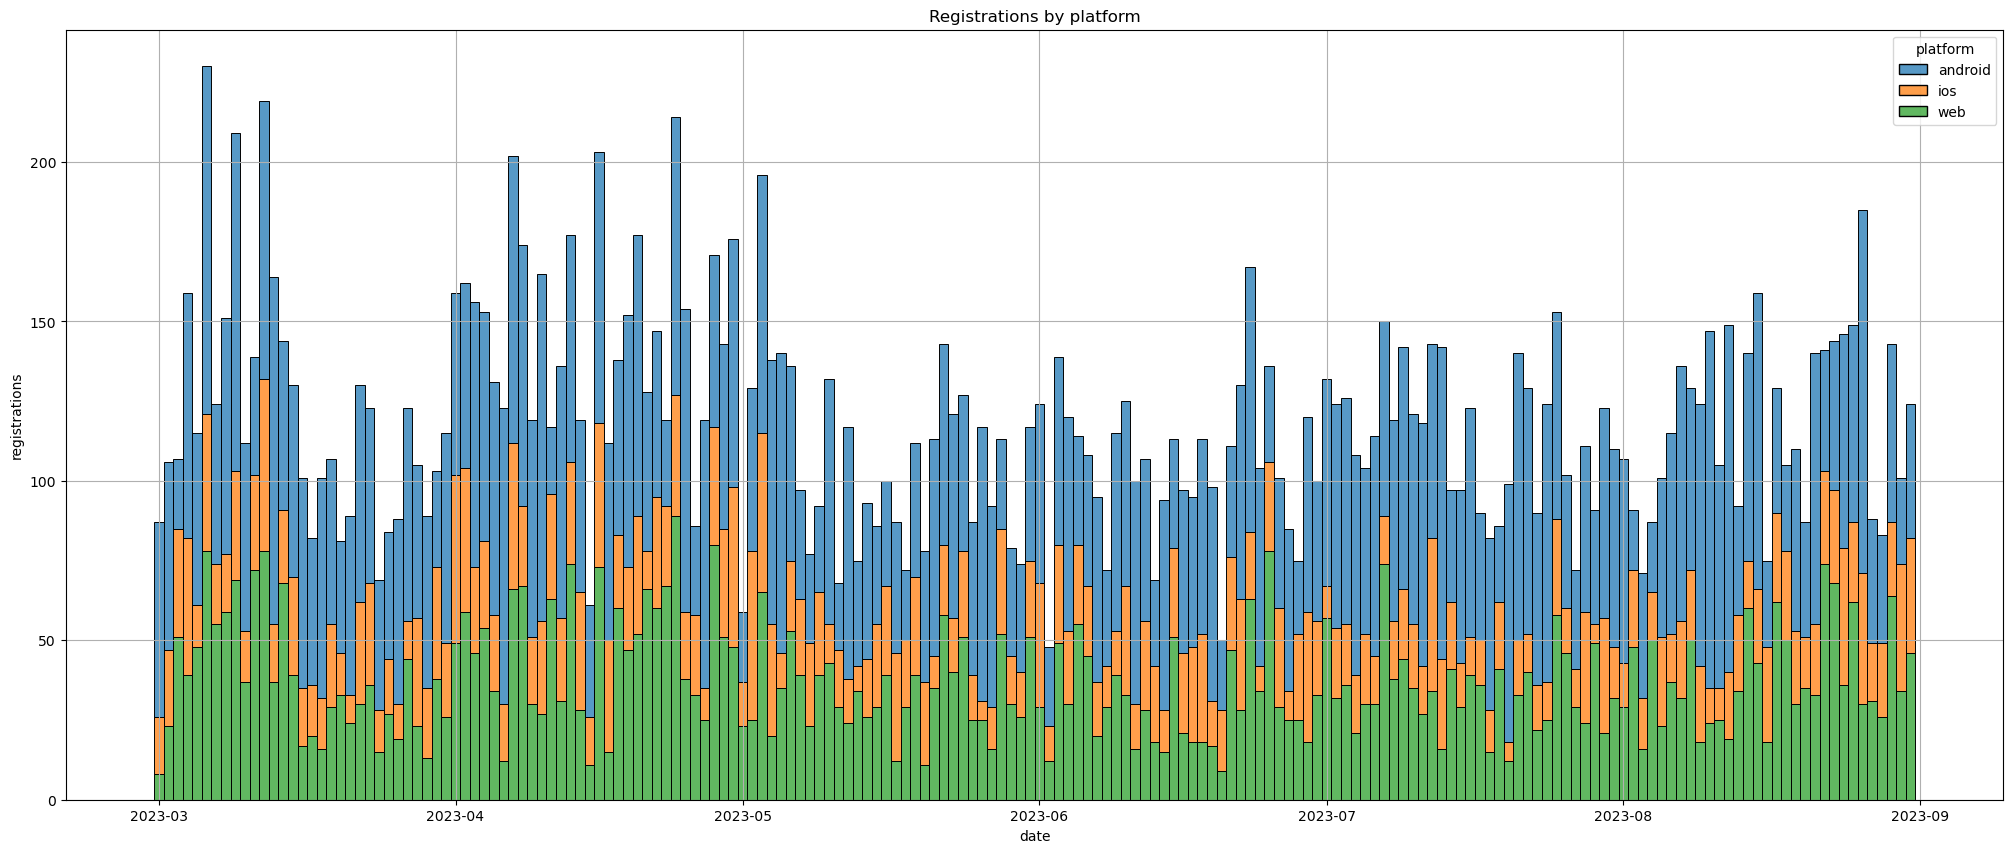

In [19]:
fig, ax = plt.subplots(figsize=(25, 10))

ax = sns.histplot(
    x='date_group',
    weights='registrations',
    hue='platform',
    data=merged_df,
    multiple='stack',
    bins=184
)

plt.title('Registrations by platform')
plt.xlabel('date')
plt.ylabel('registrations')
plt.grid(True)

#Сохраняем график
plt.savefig('./charts/4.regs_web_andr_ios.png')

plt.show()

##### 5.5 Общая конверсия

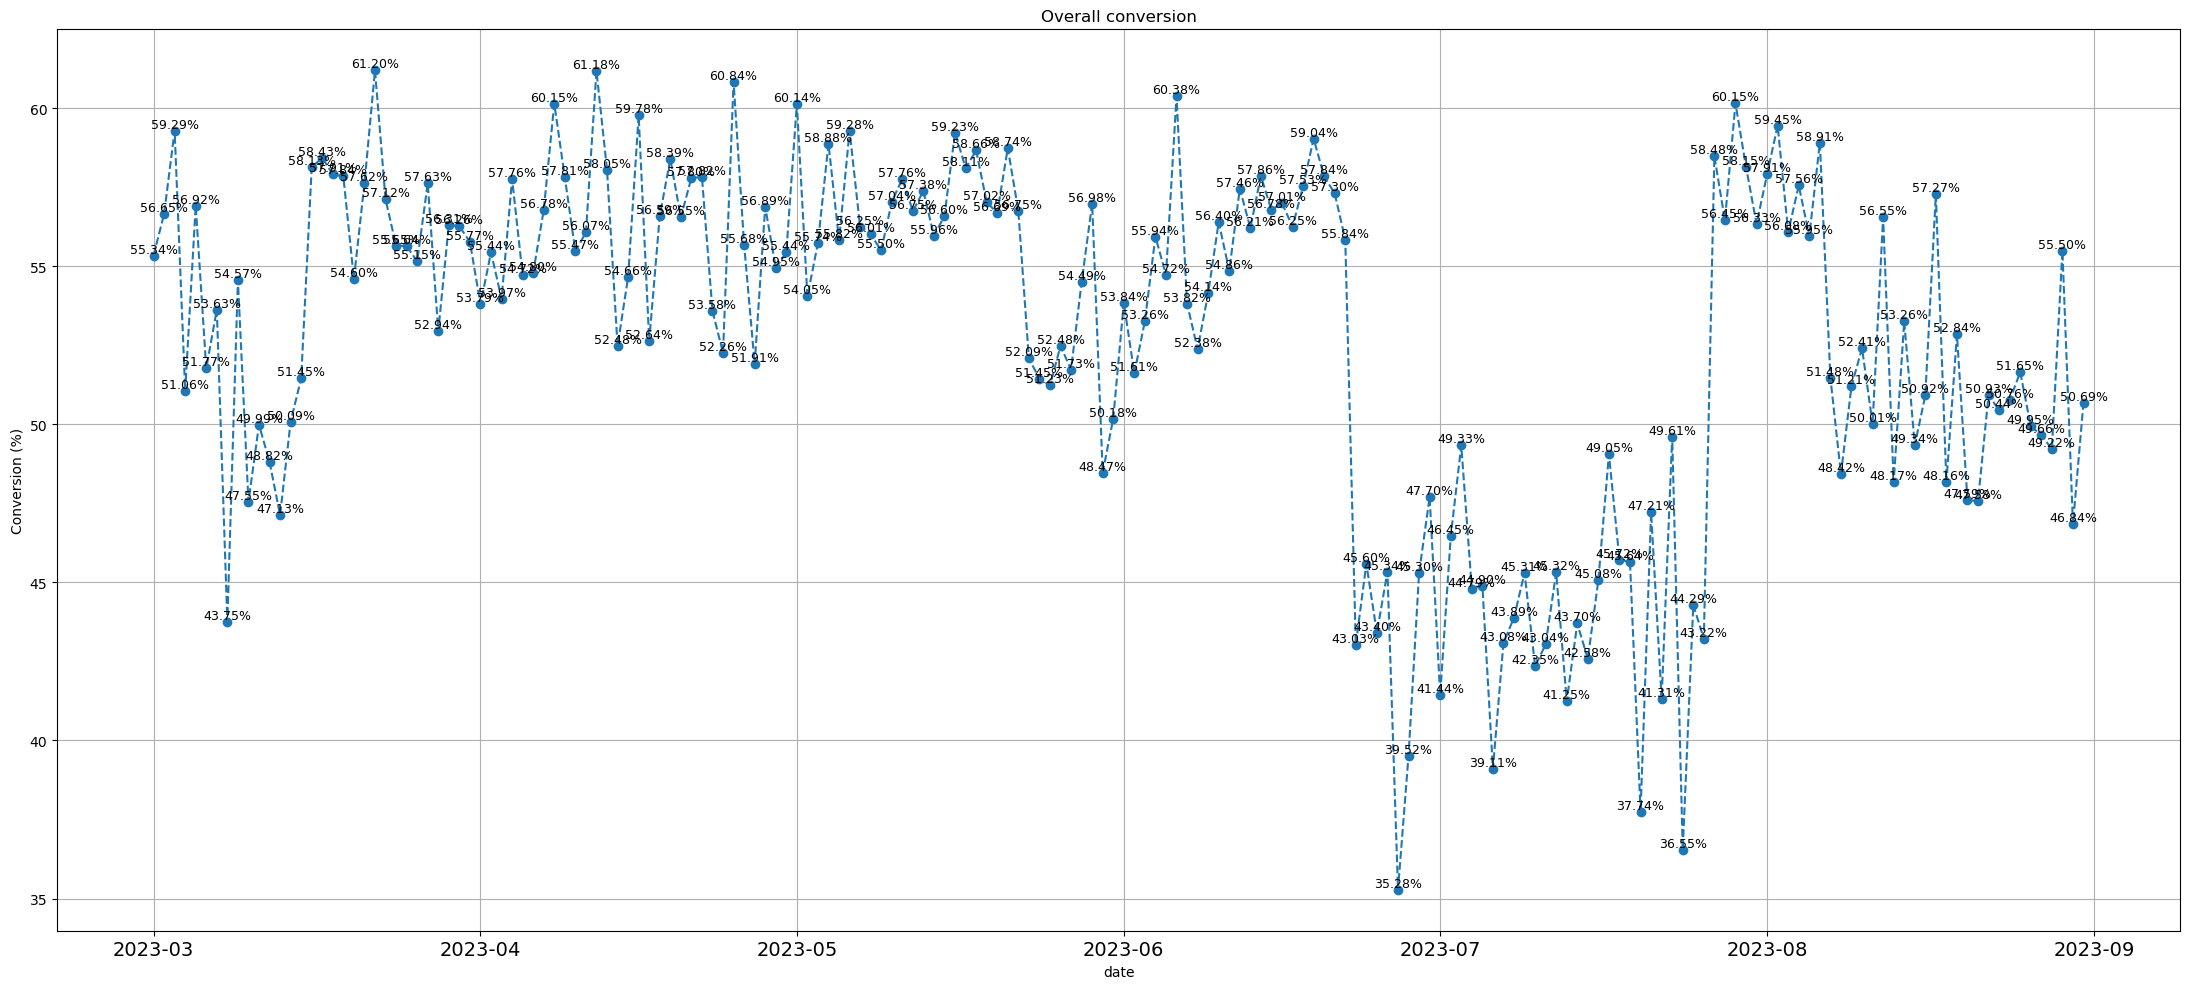

In [20]:
# Создаем final_df из merged_df
final_df = merged_df.copy()
final_df['date_group'] = pd.to_datetime(final_df['date_group'])

conversion_data = final_df.groupby('date_group')['conversion'].mean().reset_index()

# Настраиваем график
plt.figure(figsize=(22, 10))
plt.plot(conversion_data['date_group'], conversion_data['conversion'], marker='o', linestyle='dashed')

# Добавляем подписанные значения на график
for idx, row in conversion_data.iterrows():
    plt.text(row['date_group'], row['conversion'], f"{row['conversion']:.2f}%", 
             ha='center', va='bottom', fontsize=9)

plt.title('Overall conversion')
plt.xlabel('date')
plt.ylabel('Conversion (%)')
plt.xticks(fontsize=14)
plt.grid()

plt.tight_layout()

#Сохраняем график
plt.savefig('./charts/5.overall_conversion.png')

plt.show()

##### 5.6 Конверсия по каждой платформе

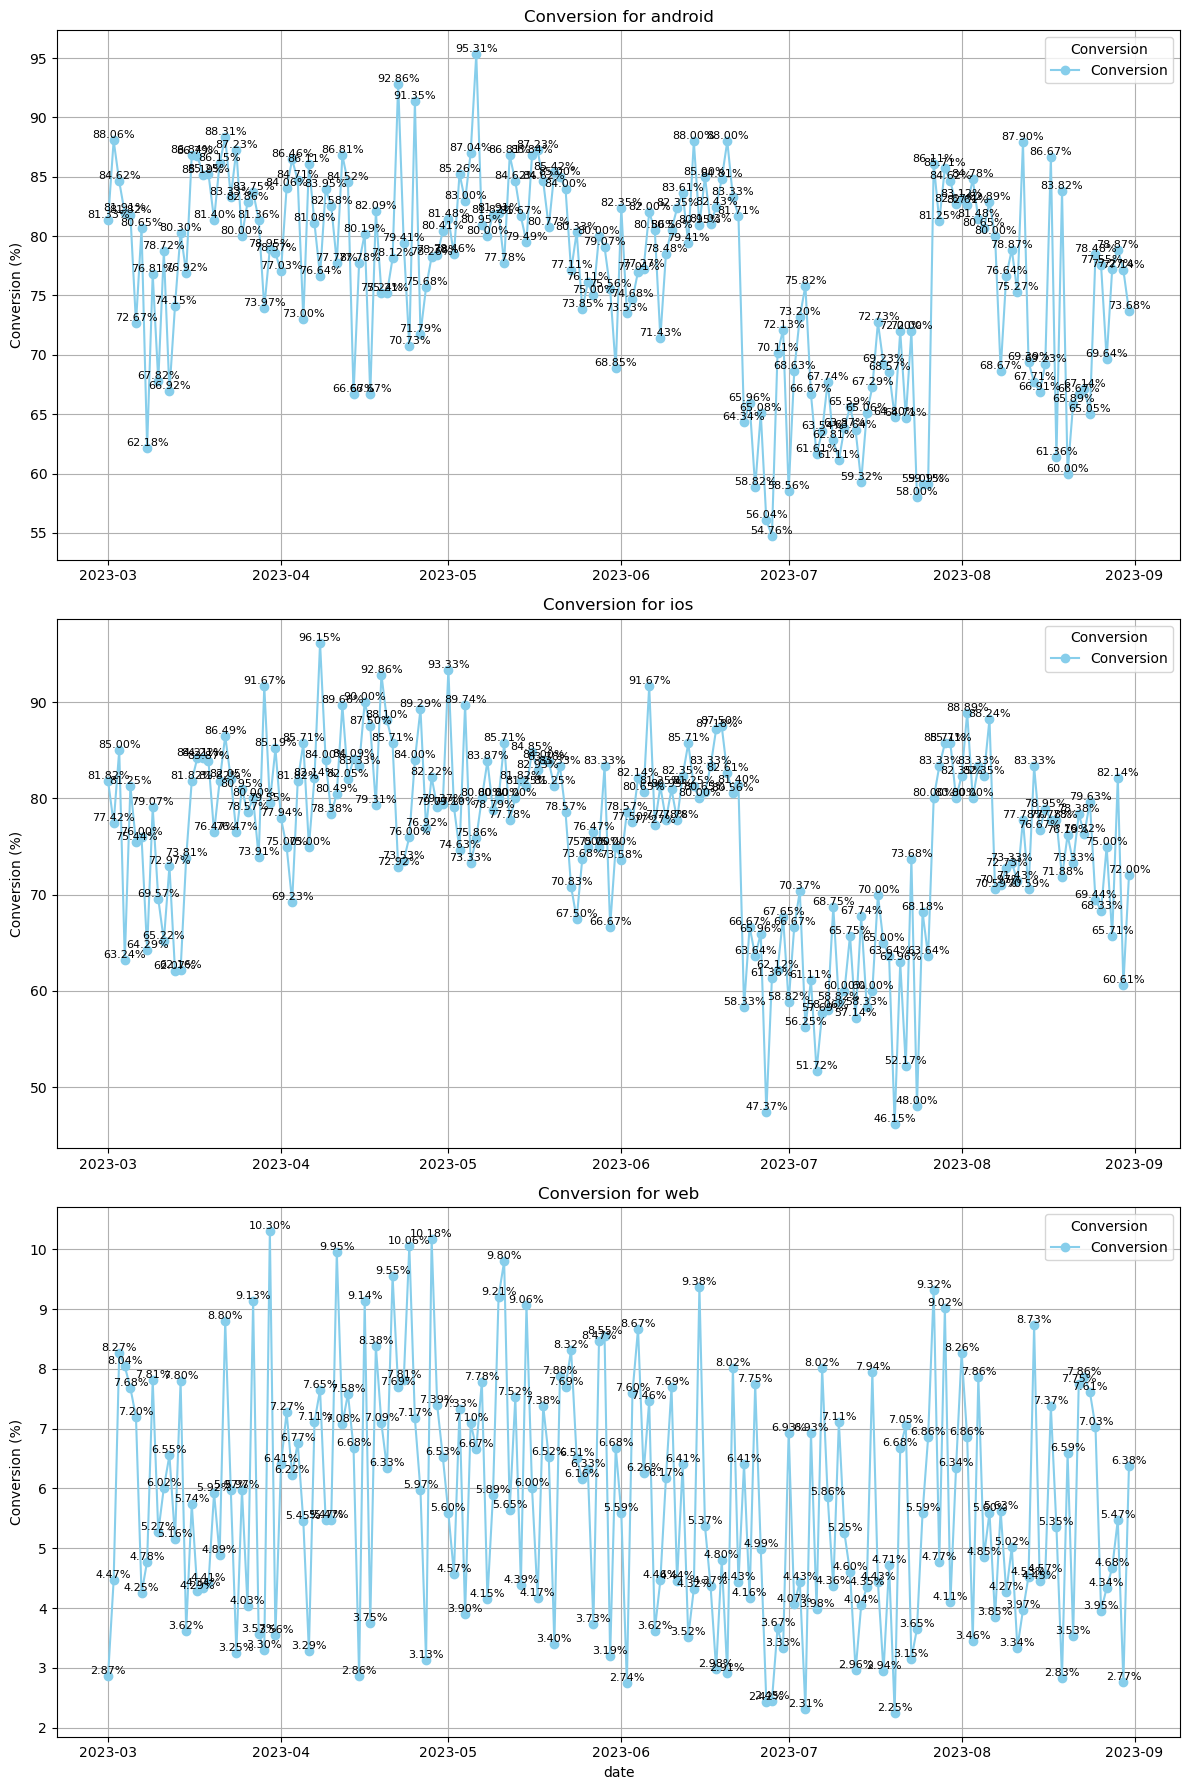

In [21]:
final_df['date_group'] = pd.to_datetime(final_df['date_group'])

# Создаем сводную таблицу для получения итоговых конверсий по дням для каждой платформы
conversion_data = final_df.groupby(['date_group', 'platform'])['conversion'].mean().reset_index()

platforms = conversion_data['platform'].unique()

# Настраиваем графики
fig, axs = plt.subplots(len(platforms), 1, figsize=(12, 18))

for i, platform in enumerate(platforms):
    platform_data = conversion_data[conversion_data['platform'] == platform]
    axs[i].plot(platform_data['date_group'], platform_data['conversion'], marker='o', color='skyblue', label='Conversion')

    # Добавляем подписанные значения на график
    for idx, row in platform_data.iterrows():
        axs[i].text(row['date_group'], row['conversion'], f"{row['conversion']:.2f}%", 
                    ha='center', va='bottom', fontsize=8)

    # Настроим заголовки и метки для каждого графика
    axs[i].set_title(f'Conversion for {platform}')
    axs[i].set_ylabel('Conversion (%)')
    axs[i].grid()
    axs[i].legend(title='Conversion')

# Настройка оси X
plt.xlabel('date')

plt.tight_layout()

#Сохраняем график
plt.savefig('./charts/6.conversion_by_web_andr_ios.png')

plt.show()

##### 5.7 Стоимости реклам

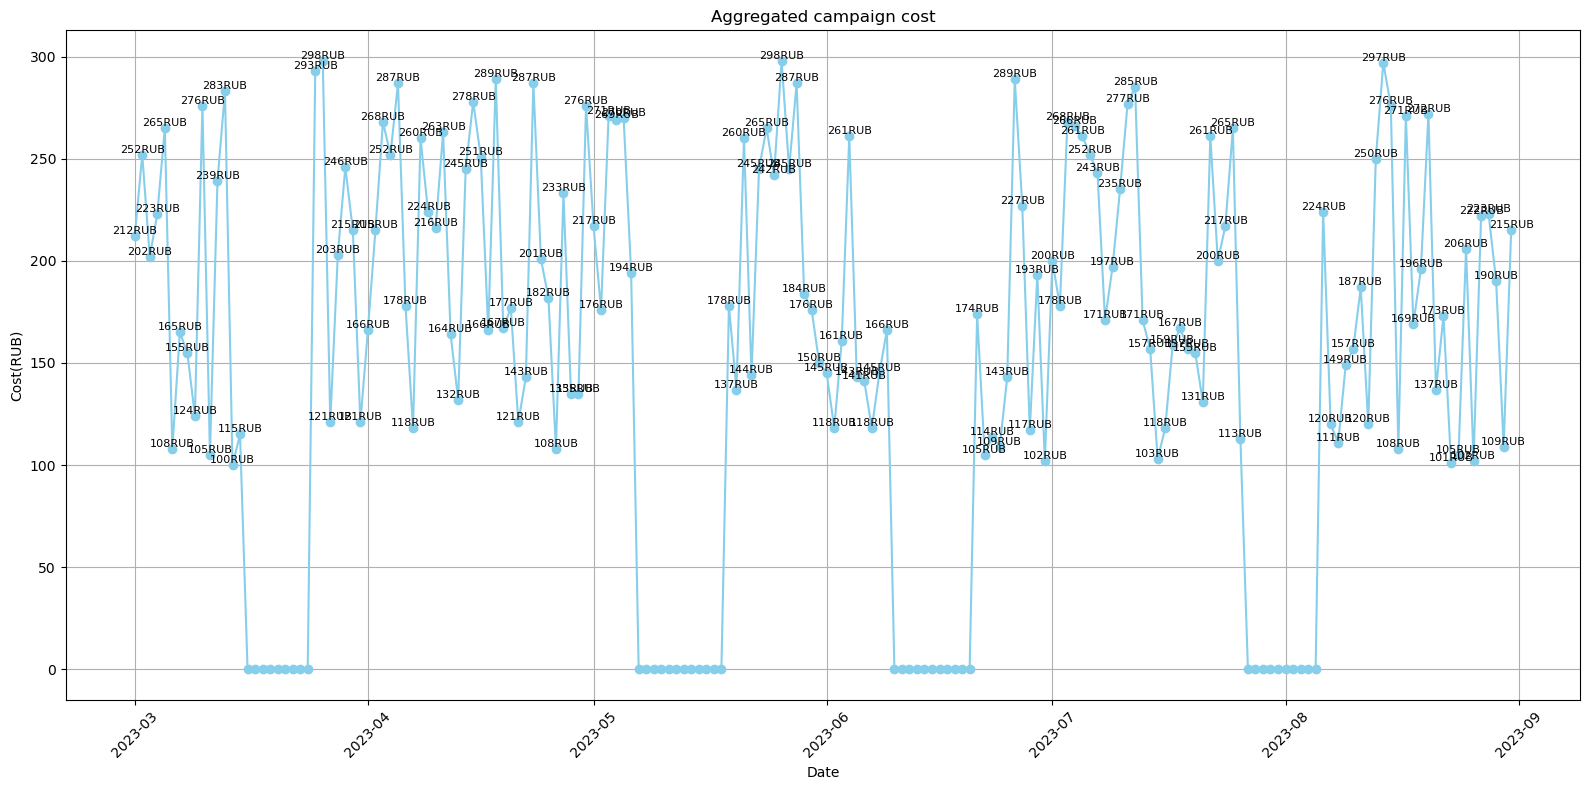

In [22]:
# Создаем final_result из ads_merged
final_result = ads_merged.copy()
final_result['date_group'] = pd.to_datetime(final_result['date_group'])

# Настройка графика
plt.figure(figsize=(16, 8))
plt.plot(final_result['date_group'], final_result['cost'], marker='o', linestyle='-', color='skyblue')

for idx, row in final_result.iterrows():
    if row['cost'] == 0:
            continue
    plt.text(row['date_group'], row['cost'], f"{row['cost']:.0f}RUB", 
             ha='center', va='bottom', fontsize=8)

# Добавление подписей и заголовка
plt.title('Aggregated campaign cost')
plt.xlabel('Date')
plt.ylabel('Cost(RUB)')
plt.xticks(rotation=45)  # Поворот меток оси X для удобства чтения
plt.grid()
plt.tight_layout()

#Сохраняем график
plt.savefig('./charts/7.ads_cost.png')

plt.show()

##### 5.8.1 + 5.9.1 Создаем campaign_periods для выделения рекламных кампаний для визуализации

In [23]:
visits_color = final_result.copy()
visits_color['date_group'] = pd.to_datetime(visits_color['date_group'])

# Создаем колонку с номерами кампаний
visits_color['campaigns_n'] = (visits_color['utm_campaign'] != visits_color['utm_campaign'].shift()).cumsum()

# Фильтруем данные, исключая строки с 'none'
campaign_periods = (visits_color
                    .dropna(subset=['utm_campaign'])
                    .loc[visits_color['utm_campaign'] != 'none']
                    .groupby(['campaigns_n','utm_campaign'])
                    .agg(start=('date_group', 'min'), finish=('date_group', 'max'))
                    .reset_index()
                   )

print("Рекламные кампании:")
campaign_periods

Рекламные кампании:


,campaigns_n,utm_campaign,start,finish
0,1,advanced_algorithms_series,2023-03-01,2023-03-15
1,3,virtual_reality_workshop,2023-03-25,2023-05-06
2,5,ui_ux_design_drive,2023-05-19,2023-06-09
3,7,women_in_tech_symposium,2023-06-21,2023-07-26
4,9,intro_to_python_course,2023-08-06,2023-08-31


##### 5.8 Визиты за весь период с цветовым выделением рекламной кампании

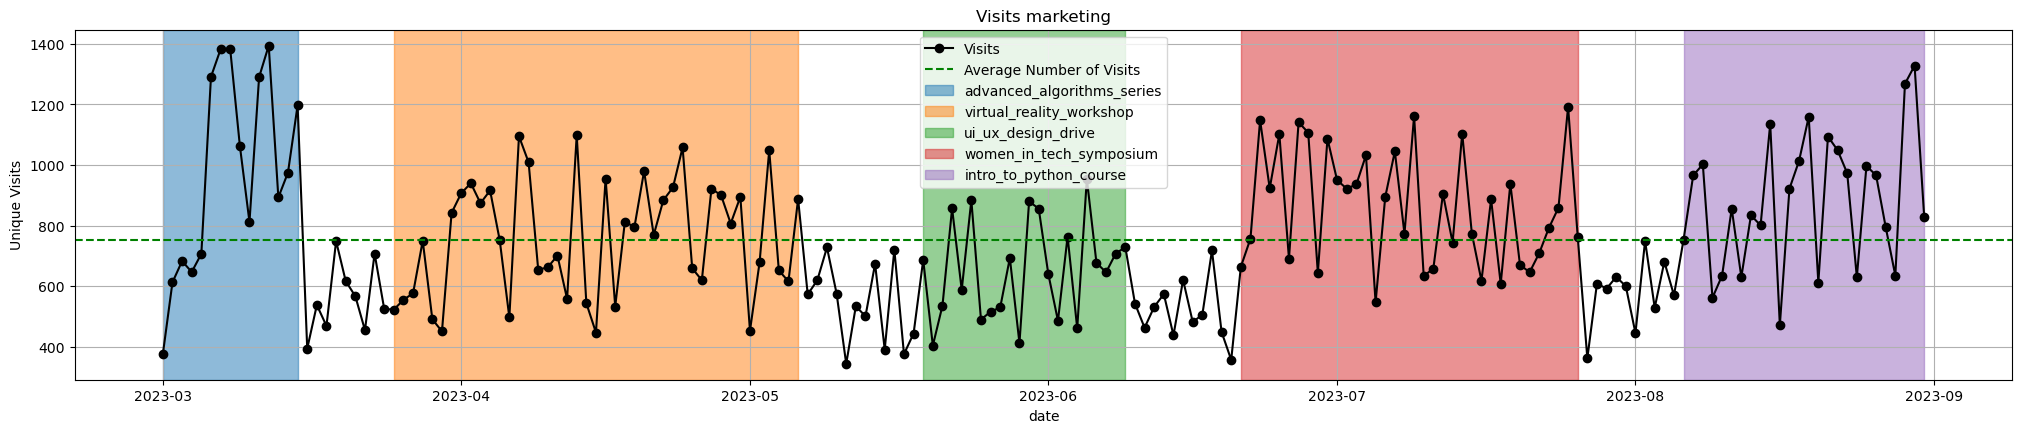

In [24]:
plt.figure(figsize = (25, 10))

campaign_colors = dict(zip(campaign_periods['utm_campaign'].unique(), plt.cm.tab10.colors[:len(campaign_periods['utm_campaign'].unique())]))
plt.subplot(2, 1, 1)

plt.plot(final_result['date_group'], final_result['visits'], marker='o', color='black', label='Visits')
plt.axhline(y=np.nanmean(final_result.visits), linestyle='dashed', color='green', label='Average Number of Visits')
for _,row in campaign_periods.iterrows():
    plt.axvspan(row['start'], row['finish'], label=row['utm_campaign'], color=campaign_colors[row['utm_campaign']], alpha=0.5)
plt.title('Visits marketing')
plt.legend()
plt.xlabel('date')
plt.ylabel('Unique Visits')
plt.grid(True)

#Сохраняем график
plt.savefig('./charts/8.visits_with_ads_compain.png')

plt.show()

##### 5.9 Регистрации за весь период с цветовым выделением рекламной кампании

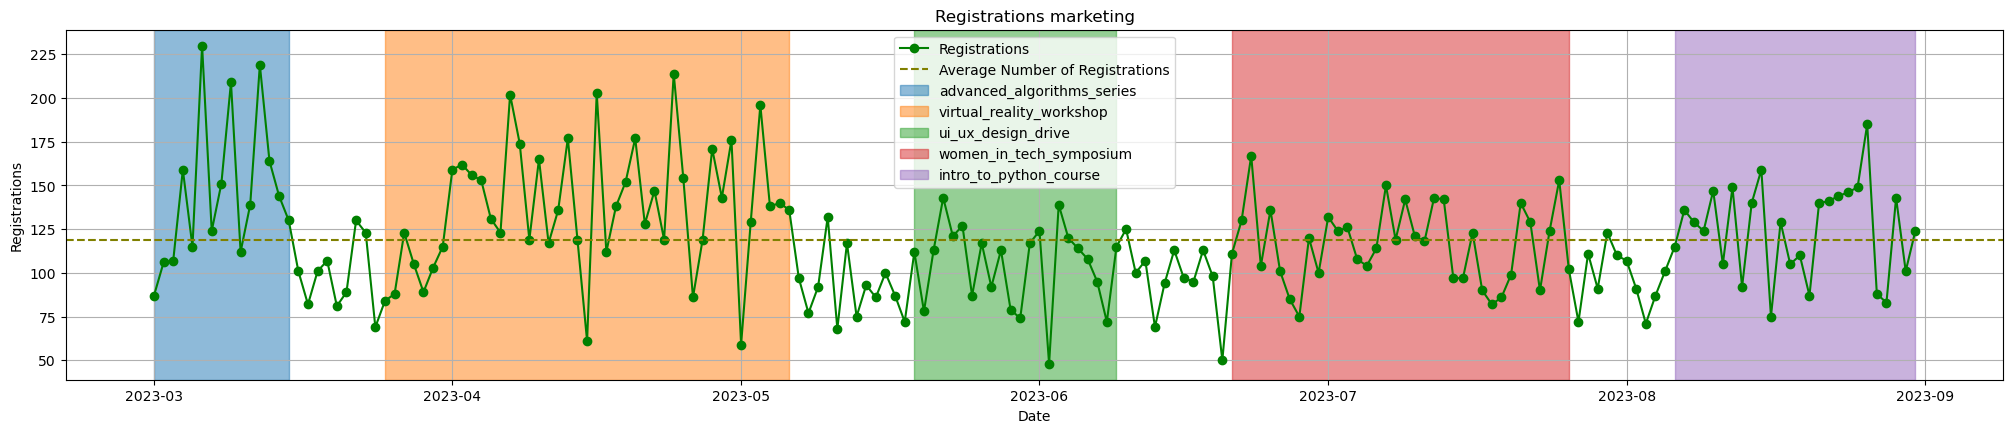

In [25]:
plt.figure(figsize=(25,10))

campaign_colors = dict(zip(campaign_periods['utm_campaign'].unique(), plt.cm.tab10.colors[:len(campaign_periods['utm_campaign'].unique())]))
plt.subplot(2, 1, 1)

plt.plot(final_result['date_group'], final_result['registrations'], marker='o', color='green', label='Registrations')
plt.axhline(y=np.nanmean(final_result.registrations), linestyle='dashed', color='olive', label='Average Number of Registrations')
for _,row in campaign_periods.iterrows():
    plt.axvspan(row['start'], row['finish'], label=row['utm_campaign'], color=campaign_colors[row['utm_campaign']], alpha=0.5)
plt.title('Registrations marketing')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Registrations')
plt.grid(True)

#Сохраняем график
plt.savefig('./charts/9. ads_regs.png')

plt.show()

##### 5.10 Зависимость посещений от рекламы

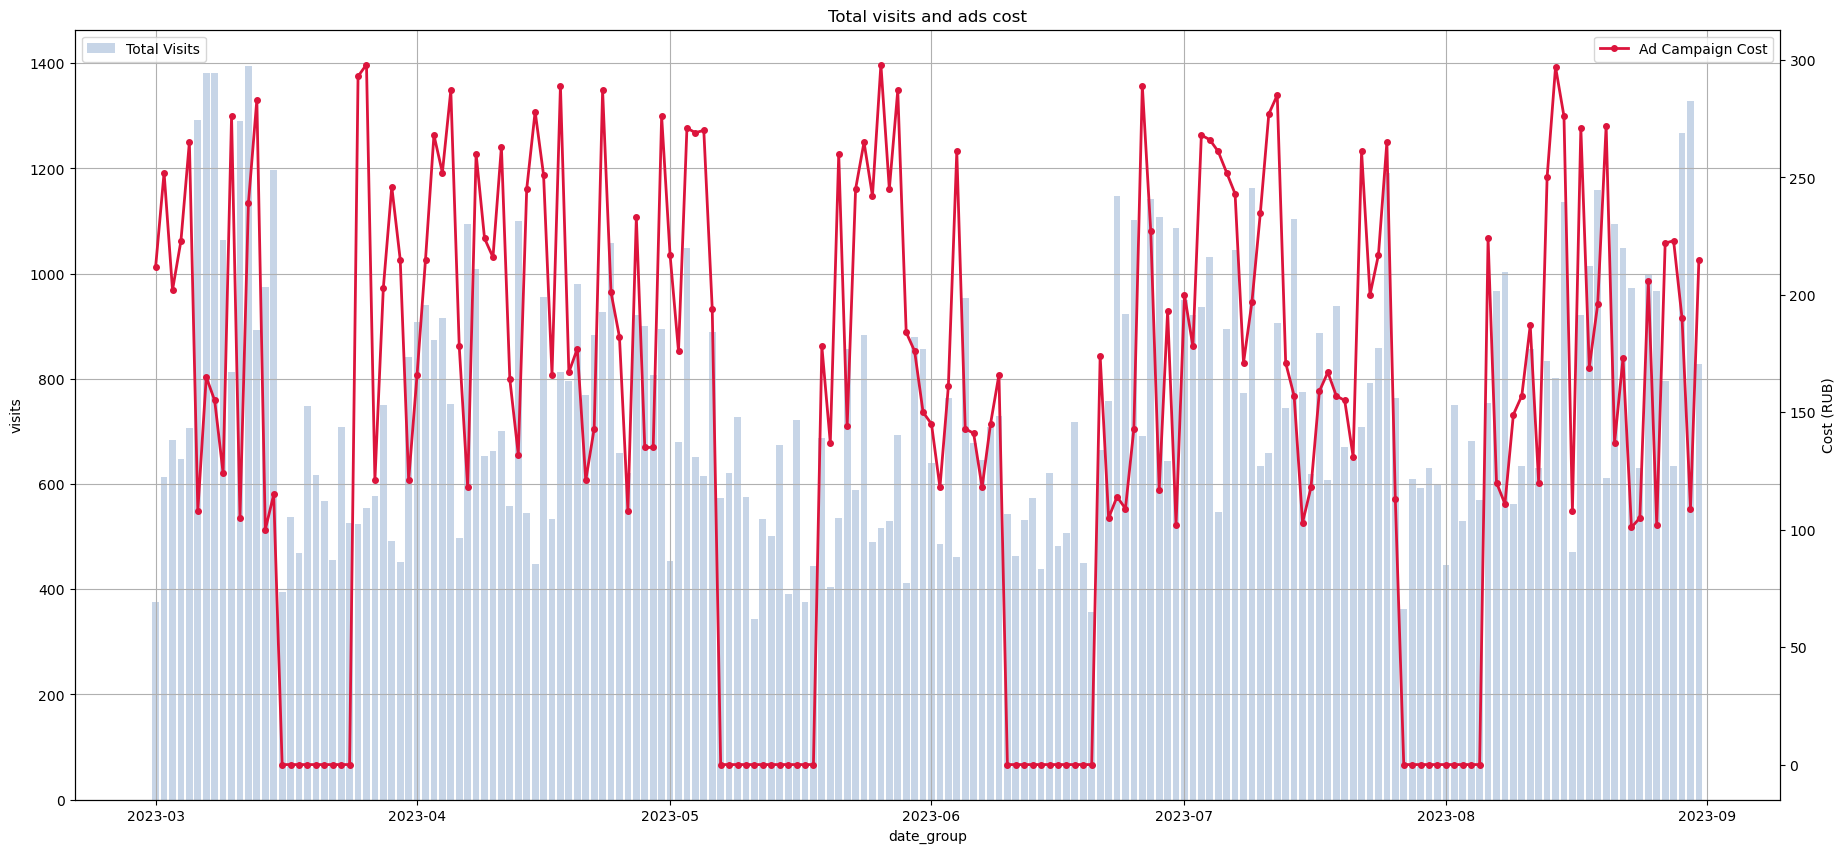

In [26]:
final_result['date_group'] = pd.to_datetime(final_result['date_group'])
fig, ax1 = plt.subplots(figsize=(22, 10))

# Изменяем цвета
ax1.bar(final_result['date_group'], final_result['visits'], label='Total Visits', color='lightsteelblue', alpha=0.7)
ax1.set_xlabel('date_group')
ax1.set_ylabel('visits')
ax1.tick_params(axis='y')
ax1.set_title('Total visits and ads cost')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(final_result['date_group'], final_result['cost'], color='crimson', linewidth=2, marker='o', markersize=4, label='Ad Campaign Cost')
ax2.set_ylabel('Cost (RUB)')
ax2.tick_params(axis='y')

# Добавляем легенды для обеих осей
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Сохраняем график
plt.savefig('./charts/10.total_visits_and_ads_cost.png')

plt.show()

##### 5.11 Зависимость регистраций от рекламы

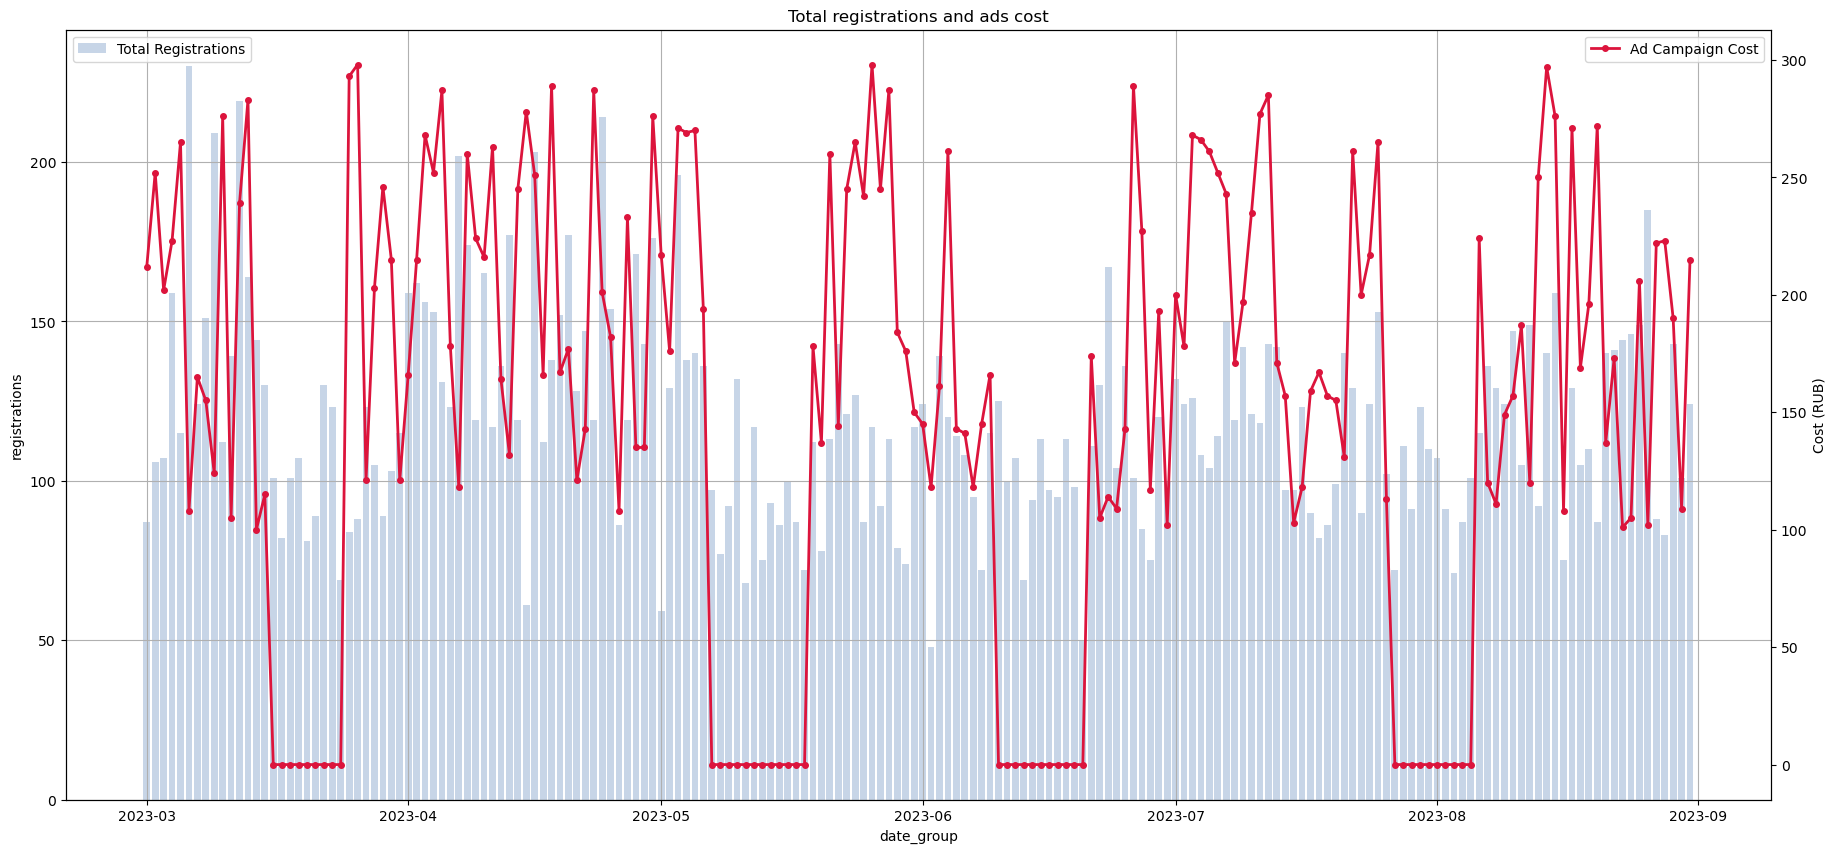

In [27]:
final_result['date_group'] = pd.to_datetime(final_result['date_group'])
fig, ax1 = plt.subplots(figsize=(22, 10))

ax1.bar(final_result['date_group'], final_result['registrations'], label='Total Registrations', color='lightsteelblue', alpha=0.7)
ax1.set_xlabel('date_group')
ax1.set_ylabel('registrations')
ax1.tick_params(axis='y')
ax1.set_title('Total registrations and ads cost')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(final_result['date_group'], final_result['cost'], color='crimson', linewidth=2, marker='o', markersize=4, label='Ad Campaign Cost')
ax2.set_ylabel('Cost (RUB)')
ax2.tick_params(axis='y')

# Добавляем легенды для обеих осей
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Сохраняем график
plt.savefig('./charts/11.total_regs_and_ads_cost.png')

plt.show()

##### 5.12 Зависимость конверсий от расходов на рекламу

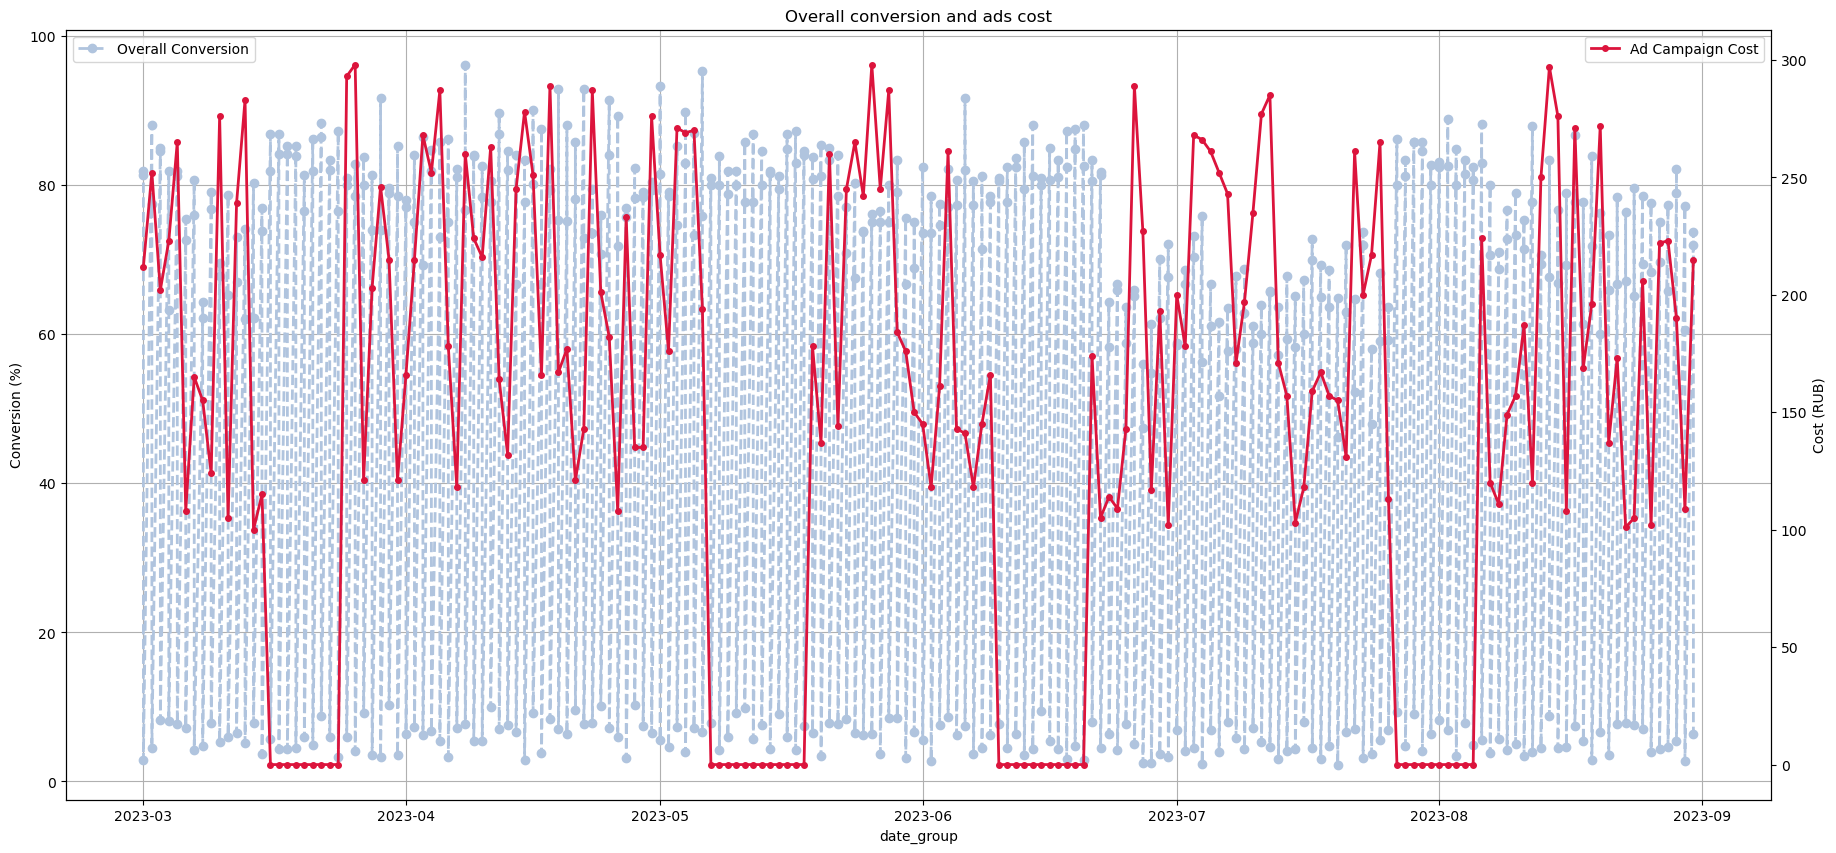

In [28]:
final_result['date_group'] = pd.to_datetime(final_result['date_group'])
fig, ax1 = plt.subplots(figsize=(22, 10))

ax1.plot(conversion_data['date_group'], conversion_data['conversion'], marker='o', linestyle='dashed', color='lightsteelblue', linewidth=2, label='Overall Conversion')
ax1.set_xlabel('date_group')
ax1.set_ylabel('Conversion (%)')
ax1.tick_params(axis='y')
ax1.set_title('Overall conversion and ads cost')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(final_result['date_group'], final_result['cost'], color='crimson', linewidth=2, marker='o', markersize=4, label='Ad Campaign Cost')
ax2.set_ylabel('Cost (RUB)')
ax2.tick_params(axis='y')

# Добавляем легенды для обеих осей
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Сохраняем график
plt.savefig('./charts/12.overall_conversion_and_ads_cost.png')

plt.show()